In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-prices/sample_submission.csv
/kaggle/input/car-prices/train.csv
/kaggle/input/car-prices/test.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
train=pd.read_csv("/kaggle/input/car-prices/train.csv")
test=pd.read_csv("/kaggle/input/car-prices/test.csv")
sample=pd.read_csv("/kaggle/input/car-prices/sample_submission.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [7]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      125690 non-null  int64  
 1   price   125690 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.9 MB


In [8]:
train.isnull().sum().sort_values

<bound method Series.sort_values of id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64>

In [9]:
train.corr(numeric_only=True)

,id,model_year,milage,price
id,1.000000,0.000076,-0.001834,-0.000877
model_year,0.000076,1.000000,-0.669936,0.231795
milage,-0.001834,-0.669936,1.000000,-0.283067
price,-0.000877,0.231795,-0.283067,1.000000


In [10]:
print(train.columns)

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')


In [11]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


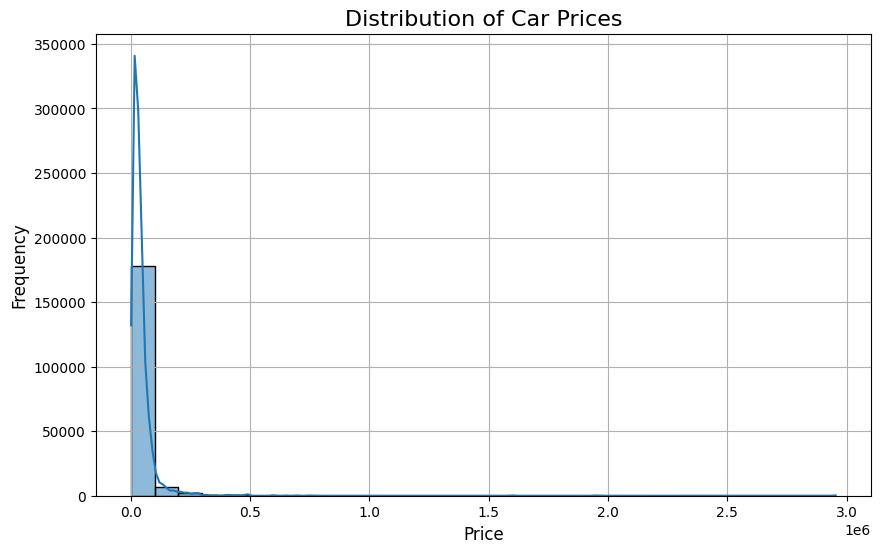

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(train['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()

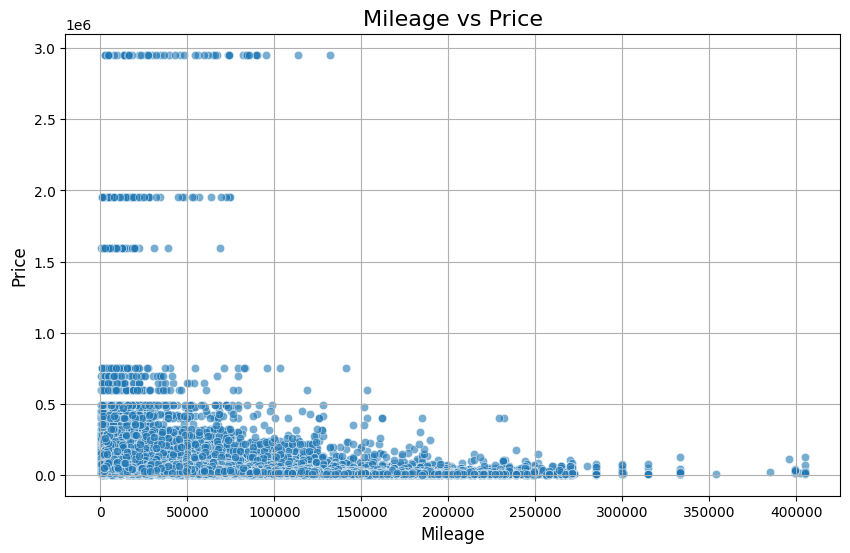

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='milage', y='price', data=train, alpha=0.6)
plt.title('Mileage vs Price', fontsize=16)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid()
plt.show()

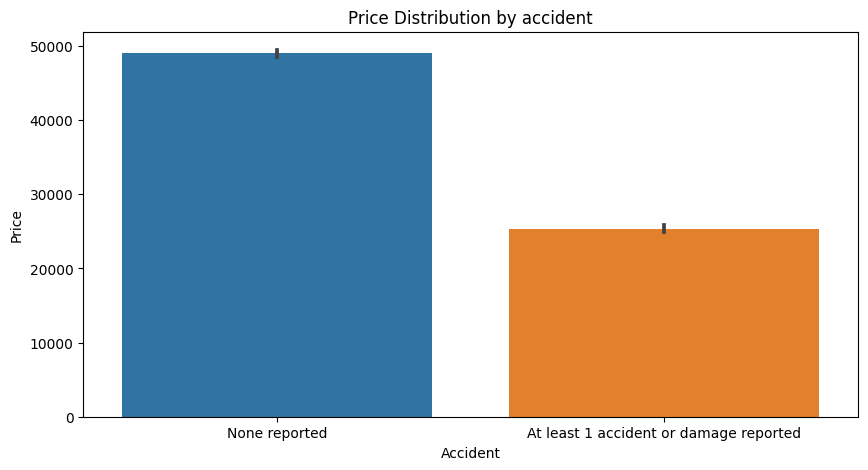

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='accident',y='price',data=train)
plt.title("Price Distribution by accident")
plt.xlabel("Accident")
plt.ylabel("Price")
plt.show()

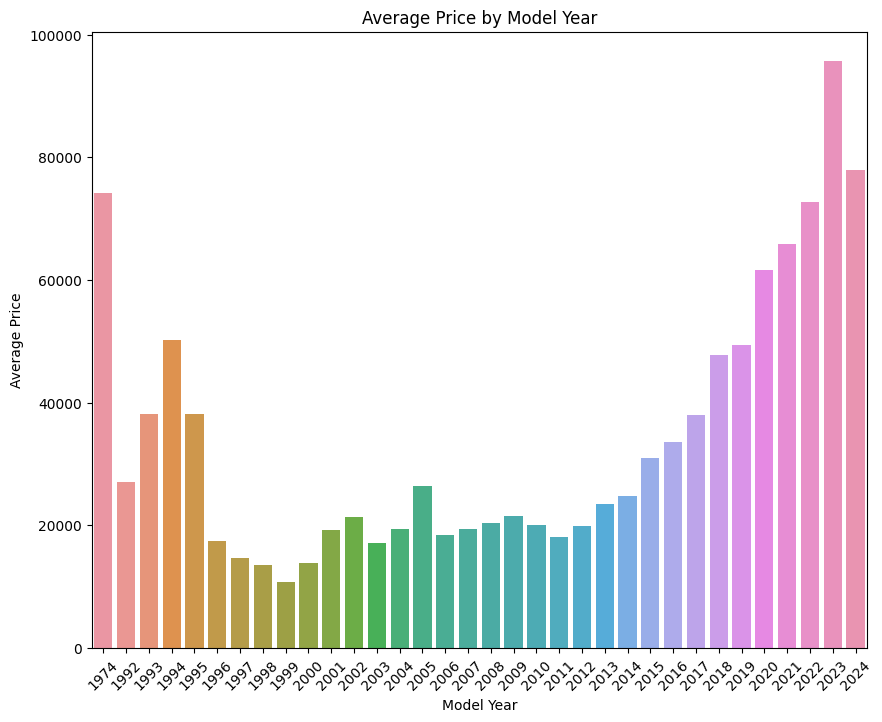

In [15]:
plt.figure(figsize=(10, 8))
avg_price_by_make = train.groupby('model_year')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_make.index, y=avg_price_by_make.values)
plt.title('Average Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

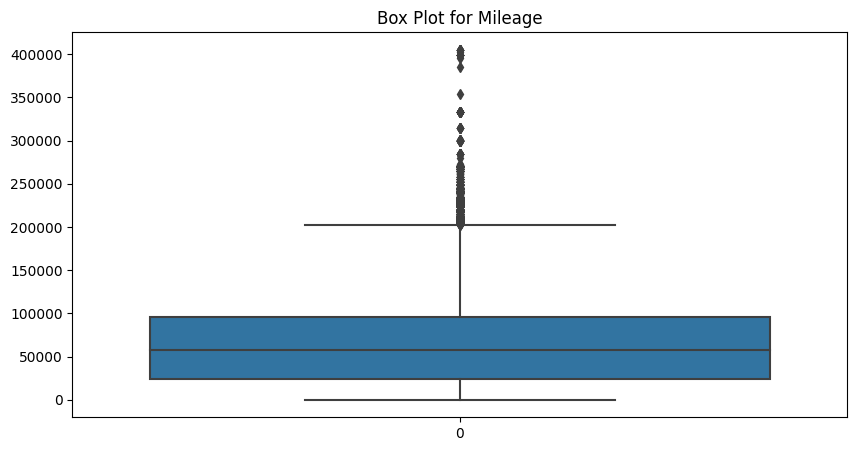

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train['milage'])
plt.title('Box Plot for Mileage')
plt.show()

In [17]:
train['fuel_type'] = train['fuel_type'].fillna('Electric')


In [18]:
train['accident'] = train['accident'].fillna(train['accident'].mode()[0])


In [19]:
train['clean_title'] = train['clean_title'].fillna('Unknown')


In [20]:
train.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [21]:
print("Train shape:", train.shape)
print(train.head())


Train shape: (188533, 13)
   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2        

In [23]:
train = train.drop(columns=['id','engine','clean_title']) 

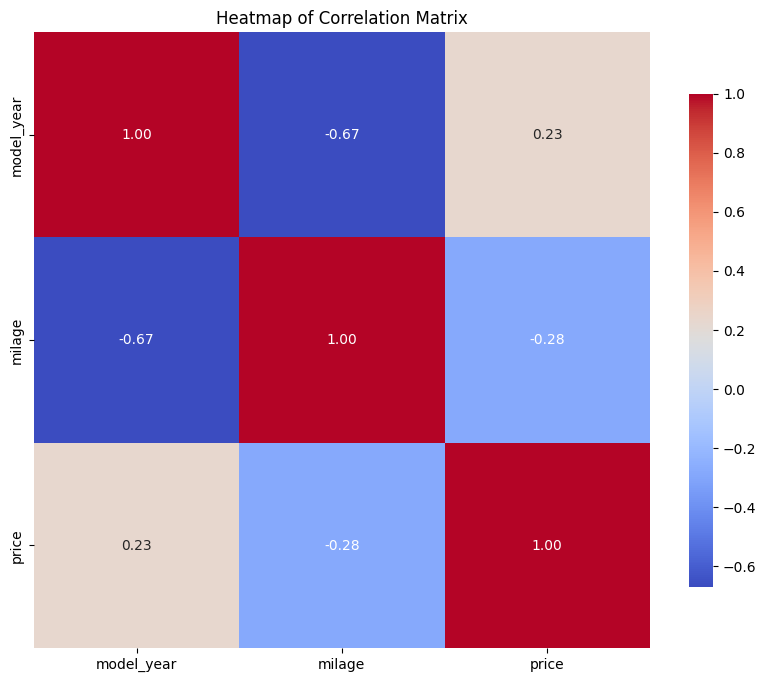

In [24]:
correlation_matrix = train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Heatmap of Correlation Matrix')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col']:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column])
    label_encoders[column] = le

In [33]:
# Example conversion: turn strings into counts
def convert_accident(value):
    if pd.isnull(value) or value == "None reported":
        return 0
    try:
        return int(value.split()[0])
    except:
        return 0

train['accident'] = train['accident'].apply(convert_accident)


In [34]:
test['accident'] = test['accident'].apply(convert_accident)


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['milage', 'model_year','accident', 'price']
train[numerical_features] = scaler.fit_transform(train[numerical_features])

In [38]:
X = train.drop(['price'], axis=1)  
y = train['price']                 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
transmission    0
ext_col         0
int_col         0
accident        0
dtype: int64

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    print(f"{name} RMSE: {rmse:.2f}")


Linear Regression RMSE: 0.90
Ridge Regression RMSE: 0.90
Lasso Regression RMSE: 0.91
Decision Tree RMSE: 0.89
Random Forest RMSE: 0.95
Gradient Boosting RMSE: 0.88
